Group Name: AG 19

Student Name (Student ID):

1. Lee Han Jian (A0248322J)

2. LI SHENGDONG (xxxxxxx)

3. ZHENG WENGRUI (A0250948W)

# Question 2

## Introduction to question 2

In the second question of this assignment, we will explore the use of local search in genome assembly.

We will use local search to assemble (construct) a large part of the nucleotide sequence of the monkeypox virus, which has been downloaded from the National Center for Biotechnology Information in the United States. Please note that no additional or specialized knowledge of biology or bioinformatics is required for this assignment. (Actually, the technical specifics of bioinformatics have been adapted and simplified for the purposes of this computer science assignment, so if you are a biologist, please do not apply preexisting knowledge to solve the problem. Furthermore, you should not attempt to search up the genome on genomic databases to "guess" the actual sequence, since we are more interested in your coding methodology rather than your attempts at reproducing a known sequence.)

This is an introductory computer science assignment and not a bioinformatics assignment; we are simply using bioinformatics as a use case to illustrate the applicability of local search to the natural sciences. Therefore, no knowledge of bioinformatics is assumed or required. In the paragraphs that follow, I will give a short crash course which will cover all the domain knowledge you will need to know in order to tackle this problem.  

For technical reasons, when we analyze the nucleotide sequence (genome) of a virus, we usually cannot “read” it in one fell swoop. We have to read the genome in parts, because the genome is usually too long for the machine to read in a single sitting. To simplify things, a “read” is a single view of part of the genome; think of it as a SUBSTRING, a partial view of the whole genome. After we have generated multiple reads of a genome, we then have to “stitch”, or combine, the different reads of the genome together. This process of stitching up reads of a genome into the final sequence is known as genome assembly. However, the different reads of the genome cannot just be concatenated like usual string concatenation. It’s not a situation where you have one read, “Hello”, and another read, “World”, and all you need to do is concatenate both strings together to make “Hello World”. Among other reasons, there are two major reasons why you can’t do so:

1. You do not know which read came first. The reads are not ordered. How do you know “Hello” came after “World”? The answer is that you don’t. Imagine how complicated this situation might be if you had more than two reads. (This is indeed our situation, where we have $n$ reads, and $n>>2$.)

2. One read may contain a substring contained in another read. Specifically, without loss of generality, part of the ending $x$ characters of a read (i.e., suffix) might also be found in the starting $x$ positions (i.e., prefix) of another read.

- A computer scientist usually creates opportunities from problems. While this may be a “problem” in that you just can’t concatenate two strings blindly, the fact that strings contain shared “substrings” is actually a very helpful clue that you can use to “join” strings together. 

- Note that the choice of the value of $x$ could be a hyperparameter decided by the computer scientist.

## Your tasks

In this part of the assignment, you will work with (simulated) reads that I have generated from the nucleotide sequence of the monkeypox virus. In reality, bioinformatics is far more complicated, but here we will work with a simplified situation. Your task is to examine the reads that I have provided for you, and from there “infer” the nucleotide sequence that might have produced those reads. 

The reads are provided in the csv file `data.csv` which simply provides a list of unique strings. Note that you should NOT assume any particular ordering of the strings in this dataframe. In fact, the strings have already been shuffled randomly. 

NOTE: You are not allowed to use `pandas` or any other libraries apart from the Python STL to load the csv file.

### Task A (3 marks): 

Create a directed graph. The nodes in the graph are the strings in the list of reads. An edge should be drawn FROM read A TO read B if and only if a suffix (of length $x$) of read A is also a prefix (obviously, also of length $x$) of read B. For the purposes of the assignment, limit the value of $x$ to between 5 and 30, both inclusive. That is, to be clear, $5\leq x\leq 30$. The weight of an edge between read A and read B should be the NEGATED value of $x$, i.e. $-x$. 

In your Jupyter notebook, please report the number of edges in your graph. Provide a barplot or histogram which shows the number of edges with different weights or weight categories. In this task, you are free to use plotting libraries such as `matplotlib` or `seaborn` to plot this graph.

As an example, if read A is "TACTAGT" and read B is "TAGTCCCCT", then an edge is drawn FROM read A TO read B (i.e., $A \rightarrow B$) with weight of $-4$. This is because the 4-suffix "TAGT" is also the 4-prefix of read B; in other words, the last 4 characters of read A (a substring of length 4) overlap with the first 4 characters of read B (a substring of length 4).

### Task B (7 marks): 

From Task A, you now have a graph which shows connections between reads based on how they overlap, in theory you could draw a path through the graph and thereby derive the full sequence (genome).

Task B asks you to use local search method(s) to determine a path through this directed graph of strings. 

- You are expected to use simulated annealing and tune the relevant configuration settings and hyperparameters. The minimum requirement is to implement simulated annealing.

- Explain tha rationale behind the choice of scheduling strategy and parameters.

- However, you may also explore other search methods in addition to simulated annealing. Marks will be awarded for effort.

Note the following constraints:

1. The path has to go through each and every vertex exactly once. For computer scientists, this constraint is reminiscent of the "Traveling Salesman's Problem", except that unlike TSP, we should not need to go back to the starting vertex again. 

2. For the purposes of neighbor generation / action selection at each node, bear in mind that a path through the graph which minimizes the total number of nucleotides in the assembled sequence is the preferred path. To state that another way, the assembled sequence should be derived from a path that goes through EACH and EVERY vertex exactly once, however we want this assembled sequence to be AS SHORT AS POSSIBLE.

3. You are not given the starting (source/origin) or ending (destination) vertex.

4. For avoidance of ambiguity, no cycles are allowed. You must not visit a vertex more than once.

5. You are not allowed to use any libraries apart from the Python Standard Library.
No import statements which import libraries outside of the Python STL should be found within your answer for Task B.

Please remember to report the assembled sequence that you obtain. Although it would be great if you can come up with a good sequence, please feel reassured that we are more interested in your APPROACH to the problem, and so you can potentially get a reasonable score on this task even if your solution is "wrong". It is the process, rather than the result, which matters more.

In [19]:
# Problem Class
class Problem:
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        raise NotImplementedError
    def result(self, state, action): raise NotImplementedError
    def is_goal(self, state):        return state == self.goal
    def action_cost(self, s, a, s1): return 1
    def h(self, node):               return 0
    
    def __str__(self):
        return '{}({!r}, {!r})'.format(
            type(self).__name__, self.initial, self.goal)

In [20]:
# Use the following Node class to generate search tree
import math
class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost)

    def __repr__(self): return '<{}>'.format(self.state)
    def __len__(self): return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): return self.path_cost < other.path_cost 

## Task A:

### Constructing the directed graph

Here we create the directed graph where the nodes in the graph are the strings in the list of reads. We first calculate the exact longest overlap from one string to another and then deal with the ones that fall outside the [5,30] in the next section.

For the representation of the directed graph, we use adjacent matrix for simplicity.

In [21]:
import csv

class DirectedGraph:
    def __init__(self):
        # strings array stores all the strings read from the csv file
        strings = []
        with open("data.csv") as csvfile:
            csvreader = csv.reader(csvfile)
            next(csvreader)  # ignore the first line
            for row in csvreader:
                strings.append(row[2])
        
        # number of reads
        number_of_reads = len(strings)
        
        # create adjacent matrix
        # since all edges always have negative weight, graph[A][B] has weight 0 means there is NO edge from A to B
        # initialize all matrix element to 0, which means there is no edge in the graph initially
        # self.adjMatrix[i][j] means the edge FROM string[i] TO string[j]
        self.adjMatrix = [[0] * number_of_reads for _ in range(number_of_reads)]
        
        # next_arrays is a list of lists which stores next arrays for all strings
        next_arrays = []
        for string in strings:
            next_arrays.append(DirectedGraph.next_array(string))
                    
        # i is the index of the FROM string (the former one, s1)
        for i in range(number_of_reads):
            # j is the index of the TO string (the latter one, s2)
            for j in range(number_of_reads):
                # there should not be edge from A to A
                if i != j:
                    # the distance from i to j is negate overlap
                    self.adjMatrix[i][j] = - DirectedGraph.overlap(strings[i], strings[j], next_arrays[j])
                    
    '''
    Calculate overlap of string A (s1) to B (s2)
    Algorithm KMP
    '''
    # calculate next array of s2, which is pattern in this case
    @staticmethod
    def next_array(s2):
        nextA = [0] * len(s2)
        j = 0
        k = -1
        nextA[j] = k
        while j < len(s2) - 1:
            if (k == -1) or (s2[j] == s2[k]):
                j += 1
                k += 1
                if s2[j] == s2[k]:
                    nextA[j] = nextA[k]
                else:
                    nextA[j] = k
            else:
                k = nextA[k]
        return nextA

    @staticmethod
    def overlap(s1, s2, next_s2):
        '''
        Returns longest overlap from s1 to s2
        i.e. the longest suffix of s1, which is also prefix of s2
        pass the next array of s2 in, since we need to compute overlap of each pair and we need to use next_s2 for several times
        '''

        l1 = len(s1)
        l2 = len(s2)
        # if l1 < l2, then we start from 0 in text
        if l1 < l2:
            i = 0
        # if l1 >= l2, then we start from (l1 - l2) in text
        else:
            i = l1 - l2

        j = 0
        while i < l1:
            if (j == -1) or (s1[i] == s2[j]):
                i += 1
                j += 1
            else:
                j = next_s2[j]
        # when i steps into the void after s1's last element
        # j is the length of the prefix matched
        return j

# Constructing the Directed graph, it may take several seconds, please wait patiently before it completes
print("Start constructing directed graph from data.csv file")    
dg = DirectedGraph()
print("Directed graph constructed!")

Start constructing directed graph from data.csv file
Directed graph constructed!


### Limiting the overlap within [5,30]

#### Enforcing the upper bound

As described in the question, we should limit the overlap from 5 to 30 (both inclusive). Firstly, we want to deal with edges with overlap larger than 30. Actually, we will see from the below code: there is only one edge has a weight less than -30, which is from Read 457 to Read 27. This edge corresponds to an overlap of 62.

In [45]:
for i,row in enumerate(dg.adjMatrix):
    for j,distance in enumerate(row):
        if distance < -30:
            print(f"Distance from Read {i} to Read {j} is {distance}")

Distance from Read 457 to Read 27 is -62


However, if we limit Read 457 to Read 27's overlap to a upper bound 30, they will happen to have an overlap of 30, i.e. the last 30 chars of Read 457 is exactly the same as the first 30 chars of Read 27. It also means that the weight of the edge from Read 457 to Read 27 is exactly -30.

The below code sllightly change the algorithm used to compute overlap from one string to another which starts comparing only from the last 30 elements of the first string, i.e. imposing the upper bound of the result to 30 (inclusive). And the result turns out to be that overlap from Read 457 to Read 27 is 30 when we impose the upper bound 30.

In [50]:
'''
Calculate overlap of string A (s1) to B (s2) with an upper bound of 30
Algorithm KMP
'''
# calculate next array of s2, which is pattern in this case
def next_array(s2):
    nextA = [0] * len(s2)
    j = 0
    k = -1
    nextA[j] = k
    while j < len(s2) - 1:
        if (k == -1) or (s2[j] == s2[k]):
            j += 1
            k += 1
            if s2[j] == s2[k]:
                nextA[j] = nextA[k]
            else:
                nextA[j] = k
        else:
            k = nextA[k]
    return nextA


def overlap(s1, s2, next_s2):
    '''
    Returns longest overlap from s1 to s2, the upper bound is 30
    i.e. the longest suffix of s1, which is also prefix of s2
    pass the next array of s2 in, since we need to compute overlap of each pair and we need to use next_s2 for several times
    '''

    l1 = len(s1)
    l2 = len(s2)
    i = l1 - 30  # impose the upper bound to 30

    j = 0
    while i < l1:
        if (j == -1) or (s1[i] == s2[j]):
            i += 1
            j += 1
        else:
            j = next_s2[j]
    # when i steps into the void after s1's last element
    # j is the length of the prefix matched
    return j


with open("data.csv") as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # ignore the first line
    for row in csvreader:
        if int(row[0]) == 457:
            s1 = row[2]
        elif int(row[0]) == 27:
            s2 = row[2]

print(f"When imposing the upper bound of 30, overlap from Read 457 to Read 27 is {overlap(s1,s2,next_array(s2))}")
            

When imposing the upper bound of 30, overlap from Read 457 to Read 27 is 30


#### Enforcing the lower bound

If Read A to Read B has an overlap less than 5, then when we impose the lower bound of 5, Read A to Read B will have no overlap. We could simply say that there is no edge from Read A to Read B.

We could simply set these edges's weight back to 0, which means there is no edge.

In [52]:
# edge count
count = 0
# count of edges with weight > -5, i.e. overlap is less than -5 
count_to_exclude = 0
for i,row in enumerate(dg.adjMatrix):
    for j,distance in enumerate(row):
        if distance != 0:
            count += 1
            if distance > -5:
                count_to_exclude += 1
            
print(f"Total number of edges in graph is {count}")
print(f"Among these edges, there are {count_to_exclude} edges has weight > -5, i.e. overlap is less than 5. If we exclude these edges, there are {count - count_to_exclude} edges in total")


Total number of edges in graph is 126876
Among these edges, there are 125369 edges has weight > -5, i.e. overlap is less than 5. If we exclude these edges, there are 1507 edges in total


#### Implement the limit of [5,30] in our directed graph

From the above two session, we can conclude that to impose the limit of [5,30] in overlap. We should

- set the weight from Read 457 to Read 27 to 30
- delete all edges with weight > -5

In the following code cell, we do the limit task.

In [55]:
# impose the upper bound
dg.adjMatrix[457][27] = -30

# impose the lower bound
for i,row in enumerate(dg.adjMatrix):
    for j,weight in enumerate(row):
        if weight > -5 and weight < 0:
            dg.adjMatrix[i][j] = 0

### Counting edges and visualization of their weight distribution

In this session, we count the number of valid edges (whose weight fall inside [-30,-5], i.e. corresponding overlap fall inside [5,30]) and visualize the distribution in bar plot using `matplotlib`.

From the above code cell, we could know we have **126876** edges in the original directed graph (weight lies between -1 to -62).

From the below code cell, we could know we have **1507** edges (whose weight is between -5 to -30) in our graph.

PS: Please make sure you have run the upper code cell imposing the limit before run the below code cell. Otherwise you will get a totally different results.

Number of valid edges is 1507


<BarContainer object of 26 artists>

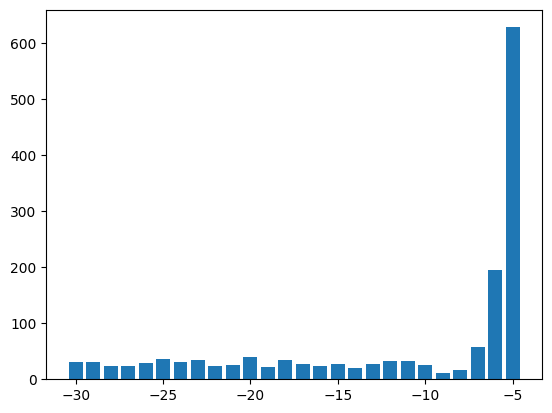

In [62]:
# Visualize the weight distribution
import matplotlib.pyplot as plt

# HashMap saving number of edges with different weight
hm = {}
# edge count
count = 0
for i,row in enumerate(dg.adjMatrix):
    for j,distance in enumerate(row):
        if distance != 0:
            count += 1
            hm[distance] = hm.get(distance, 0) + 1

print(f"Number of valid edges is {count}")
# x and height of bar plot
x = []
height = []
for dist, number in hm.items():
    x.append(dist)
    height.append(number)
plt.bar(x, height)

## Task B:

In this part, we do the inferencing work.

First of all, the goal is to minimize the length of the final string which is the combination of all strings provided. This can be reduced to maximize the total overlap of every two consecutive strings. When we define the distance from Read A to Read B as the -overlap from A to B, our goal turns into minimize the total -overlap of every two consecutive strings.

Because of this theoretical foundation, we could treat two unconnected strings (whose edge has weight 0) as the two endpoint connected with 0 overlap. Adding these 0 weight edge will not affect the total -overlap we found, nor will affect the length of the final string combined.

So in the following part, we treat 0 weight edge as they are connected with 0 -overlap and the graph becomes a fully connected graph in this sense.

### Get initial state

We first run a Greedy algorithm to get a valid initial state. For this Greedy algorithm, the state is an index list in which each index stands for the corresponding string and the order of the indexes stands for the concatenance order. For example, [1,2,3] means the first string we use is Read 1 and followed by Read 2 and finnally followed by Read3.

The initial state is `[]` which means there is no string visited. The goal state we want is a list containing all strings index without duplication which means we have visited all strings in a specific order.

We call it greedy algorithm because every time where we need to select a child to move on, we always try to add to the state list a string whose prefix has largest overlap with the state's last string's suffix.

The goal state we find in the Greedy algorithm will become the initial state of local search for TSP.

In [152]:
class Greedy:
    def __init__(self, start):
        self.graph = dg.adjMatrix
        self.vertice_number = len(dg.adjMatrix)
        self.initial_state = []
        self.start = start
        
    def is_goal(self, state):
        # if the len of state equals to the total strings number, then we know we have finished searching
        # since we will do re-visit check in proceed function so there is guaranteed to be no duplication
        # in the state list.
        return len(state) == self.vertice_number
    
    def proceed(self, state):
        # if there is at least one string index in the state
        # we choose the best successor of last_string, i.e. making overlap from last string to new string largest
        if state:
            last_string = state[-1]
            
            # min_weight is the lowest weight we have found
            min_weight = 1
            # min_index stores the string index with lowest weight
            min_index = -1
            
            # j is the index of next string we want to use
            for j in range(self.vertice_number):
                # if we haven't used string j before
                if j not in state:
                    if self.graph[last_string][j] < min_weight:
                        min_weight = self.graph[last_string][j]
                        min_index = j
                        
            state.append(min_index)
            return state

        else:
            # if it is the initial state, we just simply choose Read start
            return [self.start]
    
    # generate a goal state
    def gen(self):
        state = self.initial_state
        while not self.is_goal(state):
            state = self.proceed(state)
        return state
            
    
                
greedy = Greedy(596)
initial_state_for_TSP = greedy.gen()
print(initial_state_for_TSP)

[596, 68, 403, 471, 490, 188, 507, 142, 378, 449, 530, 176, 169, 457, 27, 523, 358, 129, 380, 65, 183, 39, 108, 30, 369, 1, 228, 298, 586, 277, 195, 517, 589, 410, 413, 71, 383, 566, 0, 224, 427, 258, 180, 89, 85, 432, 563, 96, 481, 557, 388, 593, 158, 212, 318, 54, 502, 50, 36, 306, 32, 582, 274, 499, 93, 461, 382, 564, 171, 588, 510, 107, 147, 53, 63, 196, 219, 243, 18, 352, 191, 440, 584, 311, 264, 508, 29, 400, 540, 276, 495, 208, 41, 105, 443, 497, 287, 261, 312, 307, 295, 479, 203, 423, 534, 283, 452, 235, 179, 263, 374, 49, 459, 384, 237, 57, 214, 293, 506, 174, 346, 181, 305, 477, 242, 238, 597, 82, 51, 135, 328, 334, 484, 199, 354, 524, 511, 401, 412, 362, 577, 249, 299, 335, 69, 442, 120, 441, 232, 444, 535, 175, 225, 246, 288, 145, 411, 565, 516, 301, 159, 519, 462, 6, 433, 269, 525, 448, 561, 292, 198, 542, 155, 60, 79, 303, 415, 319, 184, 317, 247, 559, 474, 94, 116, 460, 488, 469, 398, 217, 61, 111, 491, 8, 590, 389, 536, 376, 509, 437, 533, 438, 70, 381, 591, 332, 397, 1

### Implementation of Simulated Annealing


In [153]:
from random import randint, uniform, shuffle
from math import exp

# tolerance used in float point number comparison 
TOLERANCE = 0.0000001



# Code to generate neighbours, value of states, etc.
class TSP(Problem):
    #Implement TSP class here
    def __init__(self):
        self.graph = dg.adjMatrix
        self.vertice_number = len(dg.adjMatrix)
        #self.initial_state = initial_state_for_TSP
        self.initial_state = [i for i in range(self.vertice_number)]
        shuffle(self.initial_state)
        
        # cooling rate
        self.cooling_rate = 0.001
        # constant chosen as -5 since the value is negative number
        self.constant = -10
        self.initial_temperature = self.constant * self.value(self.initial_state)
    
    # Using 2-opt to find neighbors
    # cut edge from state[i-1] to state[i] and edge from state[j] to state[j+1]
    def two_opt(self, state, i, j):
        new_state = [0] * self.vertice_number
        # 0 ~ (i-1)
        for k in range(i):
            new_state[k] = state[k]
            
        # i
        new_state[i] = state[j]
        
        # (i+1) ~ (j-1)
        for k in range(i+1, j):
            new_state[k] = state[i + j - k]
        
        # j
        new_state[j] = state[i]
        
        # (j+1) ~ (vertice_number-1)
        for k in range(j+1, self.vertice_number):
            new_state[k] = state[k]
            
        return new_state
        
    
    # Expansion here is randomly choosing i and j, and using 2-opt to generate results from 
    # cutting edge from state[i-1] to state[i] and edge from state[j] to state[j+1]
    # simply return the new state returned by 2-opt
    def expand(self, state):
        # Since 2-opt will cut edge from state[i-1] to state[i] and edge from state[j] to state[j+1]
        # i is at least 1, at most (self.vertice_number - 3), both inclusive
        # j is at least (i + 1), at most (self.vertice_number - 2), both inclusive
        # to make (state[i-1], state[i]) and (state[j], state[j+1]) non-adjacent, we only need to make sure i != j
        i = randint(1, self.vertice_number - 3)
        j = randint(i + 1, self.vertice_number - 2)
        new_state = self.two_opt(state, i, j)
        return new_state
    
    # calculate the total distance of a configuration, i.e. the total -overlap of a configuration
    def value(self, state):
        res = 0
        for i in range(self.vertice_number - 1):
            res += self.graph[state[i]][state[i+1]]
        return res
    
    # schduling procedure
    def schedule(self, t):
        return self.initial_temperature * exp(- self.cooling_rate * t)
    
    def search(self):
        current_state = self.initial_state
        # t is time
        t = 1
        while True:
            # T is temperature 
            T = self.schedule(t)
            if abs(T - 0) < TOLERANCE:
                return current_state
            
            # randomly choose one neighbor randomly from neighbors
            next_state = self.expand(current_state)
            
            # Delta E
            deltaE = self.value(current_state) - self.value(next_state)
            
            if deltaE > 0:
                current_state = next_state
            else:   
                p = exp(deltaE / T)
                r = uniform(0,1)
                if r <= p:
                    current_state = next_state
            t += 1
        
tsp = TSP()
res = tsp.search()
print(res)
print(tsp.value(res))
print("A good enough result from greedy algorithm: ")
print([596, 68, 403, 471, 490, 188, 507, 142, 378, 449, 530, 176, 169, 457, 27, 523, 358, 129, 380, 65, 183, 39, 108, 30, 369, 1, 228, 298, 586, 277, 195, 517, 589, 410, 413, 71, 383, 566, 0, 224, 427, 258, 180, 89, 85, 432, 563, 96, 481, 557, 388, 593, 158, 212, 318, 54, 502, 50, 36, 306, 32, 582, 274, 499, 93, 461, 382, 564, 171, 588, 510, 107, 147, 53, 63, 196, 219, 243, 18, 352, 191, 440, 584, 311, 264, 508, 29, 400, 540, 276, 495, 208, 41, 105, 443, 497, 287, 261, 312, 307, 295, 479, 203, 423, 534, 283, 452, 235, 179, 263, 374, 49, 459, 384, 237, 57, 214, 293, 506, 174, 346, 181, 305, 477, 242, 238, 597, 82, 51, 135, 328, 334, 484, 199, 354, 524, 511, 401, 412, 362, 577, 249, 299, 335, 69, 442, 120, 441, 232, 444, 535, 175, 225, 246, 288, 145, 411, 565, 516, 301, 159, 519, 462, 6, 433, 269, 525, 448, 561, 292, 198, 542, 155, 60, 79, 303, 415, 319, 184, 317, 247, 559, 474, 94, 116, 460, 488, 469, 398, 217, 61, 111, 491, 8, 590, 389, 536, 376, 509, 437, 533, 438, 70, 381, 591, 332, 397, 115, 205, 486, 95, 456, 323, 284, 148, 21, 19, 250, 134, 296, 285, 468, 226, 31, 377, 435, 364, 562, 182, 9, 43, 109, 151, 343, 505, 321, 392, 156, 165, 125, 480, 59, 320, 138, 80, 22, 428, 133, 127, 236, 189, 308, 186, 99, 463, 62, 28, 177, 110, 262, 160, 408, 123, 420, 74, 15, 267, 280, 75, 371, 273, 26, 218, 370, 379, 430, 122, 489, 149, 255, 291, 387, 518, 404, 139, 102, 304, 453, 351, 573, 528, 578, 326, 35, 393, 434, 153, 136, 399, 567, 168, 114, 154, 240, 252, 314, 260, 363, 220, 520, 150, 569, 493, 583, 88, 581, 447, 130, 254, 103, 268, 451, 405, 470, 279, 419, 144, 345, 482, 146, 407, 81, 361, 465, 87, 44, 529, 98, 417, 72, 140, 194, 152, 580, 357, 300, 344, 492, 494, 48, 245, 221, 522, 316, 289, 286, 118, 336, 549, 366, 431, 173, 500, 52, 338, 213, 458, 17, 375, 234, 496, 38, 498, 215, 553, 282, 239, 515, 418, 426, 84, 568, 396, 356, 473, 372, 503, 464, 527, 290, 587, 560, 16, 117, 23, 4, 436, 424, 167, 76, 187, 126, 327, 359, 128, 539, 538, 164, 466, 64, 546, 570, 211, 544, 467, 210, 251, 425, 193, 521, 455, 297, 598, 331, 454, 543, 353, 20, 141, 545, 270, 574, 278, 475, 446, 478, 265, 450, 395, 394, 309, 56, 367, 548, 422, 271, 385, 77, 272, 100, 157, 541, 162, 558, 204, 429, 46, 12, 552, 329, 416, 137, 161, 230, 390, 2, 223, 33, 485, 73, 244, 202, 342, 66, 409, 483, 201, 281, 391, 445, 222, 294, 373, 348, 360, 37, 339, 322, 349, 13, 248, 14, 233, 227, 90, 504, 131, 406, 10, 24, 40, 512, 330, 216, 92, 190, 341, 556, 340, 200, 124, 11, 67, 555, 132, 501, 106, 324, 25, 166, 257, 531, 143, 97, 259, 113, 78, 472, 206, 101, 414, 163, 209, 514, 315, 421, 58, 42, 368, 192, 333, 83, 551, 537, 365, 112, 310, 576, 579, 266, 547, 594, 595, 45, 47, 91, 313, 302, 350, 241, 5, 185, 178, 275, 172, 526, 487, 229, 554, 3, 355, 337, 571, 550, 402, 119, 575, 325, 7, 231, 104, 347, 121, 170, 34, 207, 253, 197, 572, 439, 532, 592, 585, 86, 513, 256, 476, 55, 386])
print(tsp.value([596, 68, 403, 471, 490, 188, 507, 142, 378, 449, 530, 176, 169, 457, 27, 523, 358, 129, 380, 65, 183, 39, 108, 30, 369, 1, 228, 298, 586, 277, 195, 517, 589, 410, 413, 71, 383, 566, 0, 224, 427, 258, 180, 89, 85, 432, 563, 96, 481, 557, 388, 593, 158, 212, 318, 54, 502, 50, 36, 306, 32, 582, 274, 499, 93, 461, 382, 564, 171, 588, 510, 107, 147, 53, 63, 196, 219, 243, 18, 352, 191, 440, 584, 311, 264, 508, 29, 400, 540, 276, 495, 208, 41, 105, 443, 497, 287, 261, 312, 307, 295, 479, 203, 423, 534, 283, 452, 235, 179, 263, 374, 49, 459, 384, 237, 57, 214, 293, 506, 174, 346, 181, 305, 477, 242, 238, 597, 82, 51, 135, 328, 334, 484, 199, 354, 524, 511, 401, 412, 362, 577, 249, 299, 335, 69, 442, 120, 441, 232, 444, 535, 175, 225, 246, 288, 145, 411, 565, 516, 301, 159, 519, 462, 6, 433, 269, 525, 448, 561, 292, 198, 542, 155, 60, 79, 303, 415, 319, 184, 317, 247, 559, 474, 94, 116, 460, 488, 469, 398, 217, 61, 111, 491, 8, 590, 389, 536, 376, 509, 437, 533, 438, 70, 381, 591, 332, 397, 115, 205, 486, 95, 456, 323, 284, 148, 21, 19, 250, 134, 296, 285, 468, 226, 31, 377, 435, 364, 562, 182, 9, 43, 109, 151, 343, 505, 321, 392, 156, 165, 125, 480, 59, 320, 138, 80, 22, 428, 133, 127, 236, 189, 308, 186, 99, 463, 62, 28, 177, 110, 262, 160, 408, 123, 420, 74, 15, 267, 280, 75, 371, 273, 26, 218, 370, 379, 430, 122, 489, 149, 255, 291, 387, 518, 404, 139, 102, 304, 453, 351, 573, 528, 578, 326, 35, 393, 434, 153, 136, 399, 567, 168, 114, 154, 240, 252, 314, 260, 363, 220, 520, 150, 569, 493, 583, 88, 581, 447, 130, 254, 103, 268, 451, 405, 470, 279, 419, 144, 345, 482, 146, 407, 81, 361, 465, 87, 44, 529, 98, 417, 72, 140, 194, 152, 580, 357, 300, 344, 492, 494, 48, 245, 221, 522, 316, 289, 286, 118, 336, 549, 366, 431, 173, 500, 52, 338, 213, 458, 17, 375, 234, 496, 38, 498, 215, 553, 282, 239, 515, 418, 426, 84, 568, 396, 356, 473, 372, 503, 464, 527, 290, 587, 560, 16, 117, 23, 4, 436, 424, 167, 76, 187, 126, 327, 359, 128, 539, 538, 164, 466, 64, 546, 570, 211, 544, 467, 210, 251, 425, 193, 521, 455, 297, 598, 331, 454, 543, 353, 20, 141, 545, 270, 574, 278, 475, 446, 478, 265, 450, 395, 394, 309, 56, 367, 548, 422, 271, 385, 77, 272, 100, 157, 541, 162, 558, 204, 429, 46, 12, 552, 329, 416, 137, 161, 230, 390, 2, 223, 33, 485, 73, 244, 202, 342, 66, 409, 483, 201, 281, 391, 445, 222, 294, 373, 348, 360, 37, 339, 322, 349, 13, 248, 14, 233, 227, 90, 504, 131, 406, 10, 24, 40, 512, 330, 216, 92, 190, 341, 556, 340, 200, 124, 11, 67, 555, 132, 501, 106, 324, 25, 166, 257, 531, 143, 97, 259, 113, 78, 472, 206, 101, 414, 163, 209, 514, 315, 421, 58, 42, 368, 192, 333, 83, 551, 537, 365, 112, 310, 576, 579, 266, 547, 594, 595, 45, 47, 91, 313, 302, 350, 241, 5, 185, 178, 275, 172, 526, 487, 229, 554, 3, 355, 337, 571, 550, 402, 119, 575, 325, 7, 231, 104, 347, 121, 170, 34, 207, 253, 197, 572, 439, 532, 592, 585, 86, 513, 256, 476, 55, 386]
))

[486, 321, 530, 393, 473, 538, 502, 355, 213, 70, 381, 490, 557, 474, 31, 259, 239, 19, 426, 403, 192, 539, 535, 220, 25, 383, 361, 400, 92, 521, 359, 467, 566, 503, 485, 125, 126, 468, 542, 585, 548, 88, 410, 230, 298, 96, 541, 183, 364, 178, 577, 281, 208, 41, 419, 449, 63, 340, 527, 3, 349, 30, 314, 375, 409, 193, 343, 347, 567, 94, 432, 447, 73, 543, 466, 480, 407, 65, 556, 59, 360, 310, 203, 497, 81, 565, 454, 168, 170, 430, 179, 559, 103, 101, 568, 286, 442, 221, 492, 154, 47, 338, 40, 266, 428, 32, 531, 313, 5, 157, 86, 279, 107, 465, 434, 196, 238, 131, 127, 199, 84, 156, 33, 475, 368, 258, 117, 575, 44, 162, 555, 404, 443, 560, 528, 49, 161, 227, 294, 68, 169, 140, 35, 587, 151, 185, 282, 569, 120, 153, 337, 4, 554, 327, 69, 164, 207, 592, 143, 124, 518, 363, 436, 420, 488, 277, 402, 398, 529, 163, 494, 437, 524, 290, 304, 50, 458, 270, 574, 517, 67, 115, 128, 511, 9, 553, 491, 583, 138, 509, 596, 219, 370, 318, 362, 217, 588, 116, 222, 418, 210, 422, 251, 425, 172, 62, 85, 10